### Load the Given data set fruit.csv, which contains the samples of fruit's mass, height, and name.  https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv columns
* fruit name: mandarin, apple, lemon
* mass
* height

In [22]:
#Load the Given data set fruit.csv, which contains the samples of fruit's mass, height, and name.
#https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv
#columns
#   fruit name: mandarin, apple, lemon
#   mass
#   height
#import pandas
#create the fruit dataframe from the fruit.csv file

import pandas as pd

fruit = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/fruit.csv')
fruit.head()

,fruit_name,mass,height
0,lemon,116,7.9
1,lemon,116,8.5
2,lemon,116,8.0
3,lemon,116,8.1
4,lemon,118,8.0


### Split the dataset into features variables and target variables

In [23]:
#Define the features as mass and height, and the target as the variable "isLemon", 
#which is derived by yourself (if fruit is lemon then 1 else -1). 
#Print the feature matrix and target vector, respectively.
#import numpy
#create the 'isLemon' column, using np.where to define the target variable as either 1 or -1
#create the features dataframe X, using iloc to define only the two feature columns mass and height
#create the target variable array, using iloc to define the target column 'isLemon'
import numpy as np

fruit['isLemon'] = np.where(fruit['fruit_name']=='lemon',1,-1)
X = fruit.iloc[:,1:3].values
y = fruit.iloc[:,3].values
print('Feature matrix is')
print (X[:5])
print('Target vector is')
print(y[:5])

Feature matrix is
[[116.    7.9]
 [116.    8.5]
 [116.    8. ]
 [116.    8.1]
 [118.    8. ]]
Target vector is
[1 1 1 1 1]


### Create a scatterplot of the target variable by feature variables (mass and height)

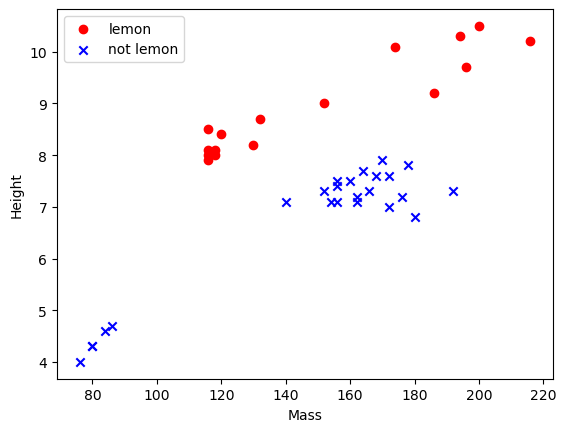

In [5]:
#Draw a scatter plot of the binary classification (isLemon) by two features (mass, height).
#import matplotlib.pyplot
#call the scatter plot function from matplotlib
#plot the first 16 samples for (isLemon) from the fruit dataset
#plot the last 24 samples for any samples not classified as Lemon from the fruit dataset
#add x and y axis labels to the scatter plot
#add the location of the scatter plot legend

import matplotlib.pyplot as plt

plt.scatter(X[:16,0], X[:16,1],color='red',marker='o',label='lemon')
plt.scatter(X[16:,0], X[16:,1],color='blue',marker='x',label='not lemon')
plt.xlabel('Mass')
plt.ylabel('Height')
plt.legend(loc='upper left')
plt.show()

### Create a Classification Model using the Perceptron Algorithm

#### Add a new variable to the dataframe

In [8]:
#Add x0 vector to the feature matrix X.  
#define a new variable shape and pass in the number of rows from our feature matrix using indexing
#define a new variable x0 and using the np.ones function we create an array filled with the integer one
#the function takes an argument for shape which we pass in the shape variable created in the previous step
#using the reshape function we change the shape of the array to the 1x1 matrix
#using the np function hstack, we add the x0 vector to the existing feature matrix X
#print X to confirm the x0 vector was added successfully

shape = X.shape[0]
x0 = np.ones(shape=shape).reshape(-1,1)
X = np.hstack([x0,X])
X[:5]

array([[  1. ,   1. , 116. ,   7.9],
       [  1. ,   1. , 116. ,   8.5],
       [  1. ,   1. , 116. ,   8. ],
       [  1. ,   1. , 116. ,   8.1],
       [  1. ,   1. , 118. ,   8. ]])

#### Define the Perceptron Class, utilizing the Perceptron algorithm to create a predictive classification model

In [9]:
#define the Perceptron class and corresponding functions to run the Perceptron algorithm


import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    -----------
    eta: float
       Learning rate (between 0.0 and 1.0)
    n_iter: int
       Passes over the training dataset.
    random_state: int
       Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_: 1d-array
       Weights after fitting.
    errors_: list
       Number of missclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
           Training vectors, where n_samples is the number of samples and
           n_features is the number of features.
        y: array-like, shape = [n_samples]
           Target values.

        Returns
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # get the initial weight
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return X @ self.w_
  

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


#call the Perceptron class and pass in the arguments for the learning rate and the number of iterations = 100,000
#fit the Perceptron algorithm with our feature matrix and target vector
ppn = Perceptron(eta=0.1, n_iter=10**5)
ppn.fit(X,y)

#### Plot the Errors for the Perceptron Algorithm

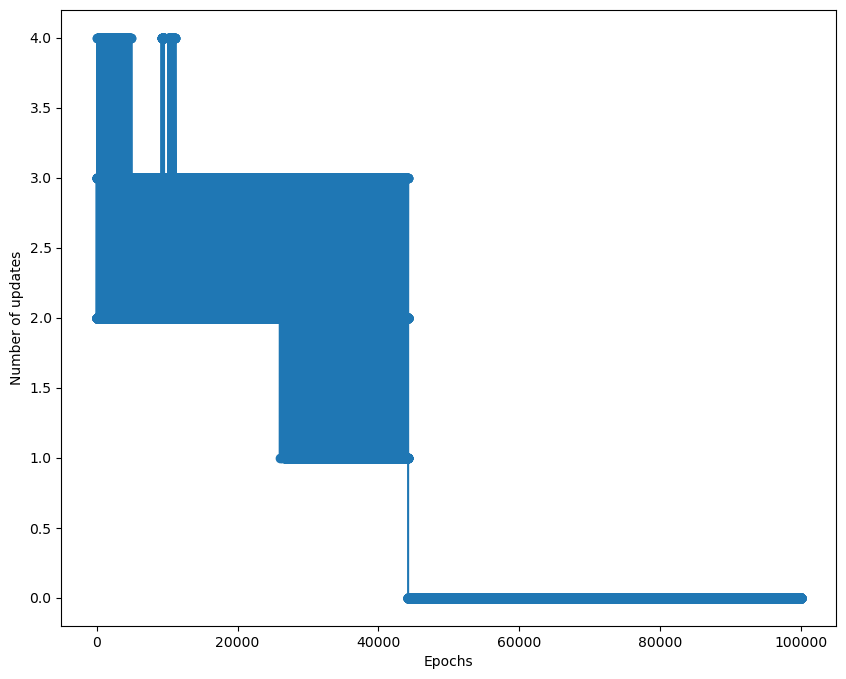

In [11]:
#import matplotlib.pyplot library
#import matplotlib.pyplot figure function
#call the figure function and pass in arguments for the size of the plot we want returned
#call the plot function
#pass in the argument for the x axis - the length of the errors_ list
#pass in the argument for the y axis - the number of errors for each entry in errors_ list
#add the x and y lables to the plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(10,8))
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### Return the number of errors from the last epoch in the Perceptron Algorithm

In [12]:
#create a variable errors
#call the errors_ object from the Perceptron class
#pass in the last value from the errors_ list using indexing
#using the print statement print the number of errors returned from the last epoch

errors = ppn.errors_[-1]
print('Number of Errors:', errors)

Number of Errors: 0


### Utilize Feature Scaling to improve the Perceptron Algorithm performance

In [13]:
#import the StandardScaler module from scikit learn
from sklearn.preprocessing import StandardScaler

In [24]:
#call the StandardScaler module
#fit the feature matrix to the StandardScaler
#create the normalized feature matrix
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [25]:
#define a new variable shape and pass in the number of rows from our feature matrix using indexing
#define a new variable x0 and using the np.ones function we create an array filled with the integer one
#the function takes an argument for shape which we pass in the shape variable created in the previous step
#using the reshape function we change the shape of the array to the 1x1 matrix
#using the np function hstack, we add the x0 vector to the existing feature matrix X
shape = X_std.shape[0]
x0 = np.ones(shape=shape).reshape(-1,1)
X_std = np.hstack([x0,X_std])

In [26]:
#define the Perceptron class and corresponding functions to run the Perceptron algorithm
class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    -----------
    eta: float
       Learning rate (between 0.0 and 1.0)
    n_iter: int
       Passes over the training dataset.
    random_state: int
       Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_: 1d-array
       Weights after fitting.
    errors_: list
       Number of missclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
           Training vectors, where n_samples is the number of samples and
           n_features is the number of features.
        y: array-like, shape = [n_samples]
           Target values.

        Returns
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # get the initial weight
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return X @ self.w_
  

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


#call the Perceptron class and pass in the arguments for the learning rate and the number of iterations = 100,000
#fit the Perceptron algorithm with our feature matrix and target vector
ppn = Perceptron(n_iter=10)
ppn.fit(X_std,y)

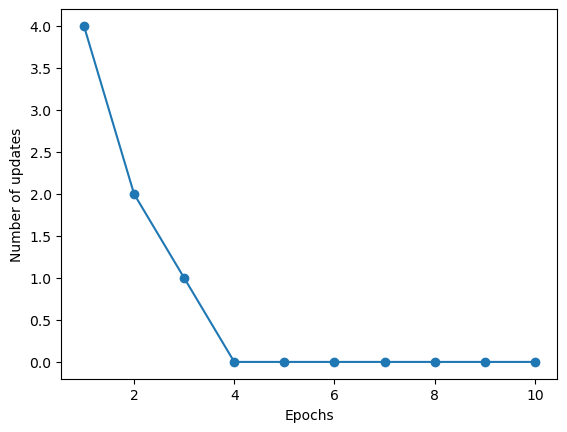

In [27]:
#call the plot function
#pass in the argument for the x axis - the length of the errors_ list
#pass in the argument for the y axis - the number of errors for each entry in errors_ list
#add the x and y lables to the plot
plt.plot(range(1, len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()